In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths

from time import time# timer for debug

    # gather results obtained from the runs

    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [3]:
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Time New Roman'],'size':12})
rc('text', usetex=True)
fm = matplotlib.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v310.json"))

fm.findfont("serif", rebuild_if_missing=False)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [4]:
## Load the temperatures and other parameters #

In [5]:
foldername = '../../MFUs/Runs_04-09-20_EasyPhase_L8/'
filenamelist = ['KEasyPhase_L8_it0_nsm524288_folder/backup']
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, 
 htip, Ttip, pswitch, uponly, path,
 temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh, 
 stat_hfields, hfields_plots, listfunctions, sref, ids2walker] = \
af.LoadParameters(foldername, filenamelist)

In [9]:
# Create a folder to save the pictures
foldername = '../../MFUs/OverviewEasyPhase/'
#foldername = '../Analysis_PSI/Runs_12-11-19_ssfMagnField/'
results_foldername = 'Results_14-09-20_Mash_04-09/'
os.makedirs('./' + foldername + results_foldername, exist_ok = True)

filenamelist= ['../../MFUs/Runs_04-09-20_EasyPhase_L2/Results_14-09-20/',
               '../../MFUs/Runs_04-09-20_EasyPhase_L4/Results_14-09-20/',
               '../../MFUs/Runs_04-09-20_EasyPhase_L6/Results_14-09-20/',
               '../../MFUs/Runs_04-09-20_EasyPhase_L8/Results_14-09-20/',
               '../../MFUs/Runs_04-09-20_EasyPhase_L10/Results_14-09-20/',
               '../../MFUs/Runs_04-09-20_EasyPhase_L12/Results_14-09-20/']
n = len(filenamelist)

In [13]:
L = [2,4,6,8,10, 12]
S = []
Smin = []
Smax =[]
C = []
ErrC = []

for i, filename in enumerate(filenamelist):
    S.append(np.loadtxt(filename +"/AvgS.txt" ))
    Smin.append(np.loadtxt(filename +"/AvgSmin.txt" ))
    Smax.append(np.loadtxt(filename +"/AvgSmax.txt" ))
    C.append(np.loadtxt(filename +"/AvgC.txt" ))
    ErrC.append(np.loadtxt(filename +"/ErrC.txt" ))

In [14]:
tidmin = 0
tidmax = len(temperatures_plots[0])-1

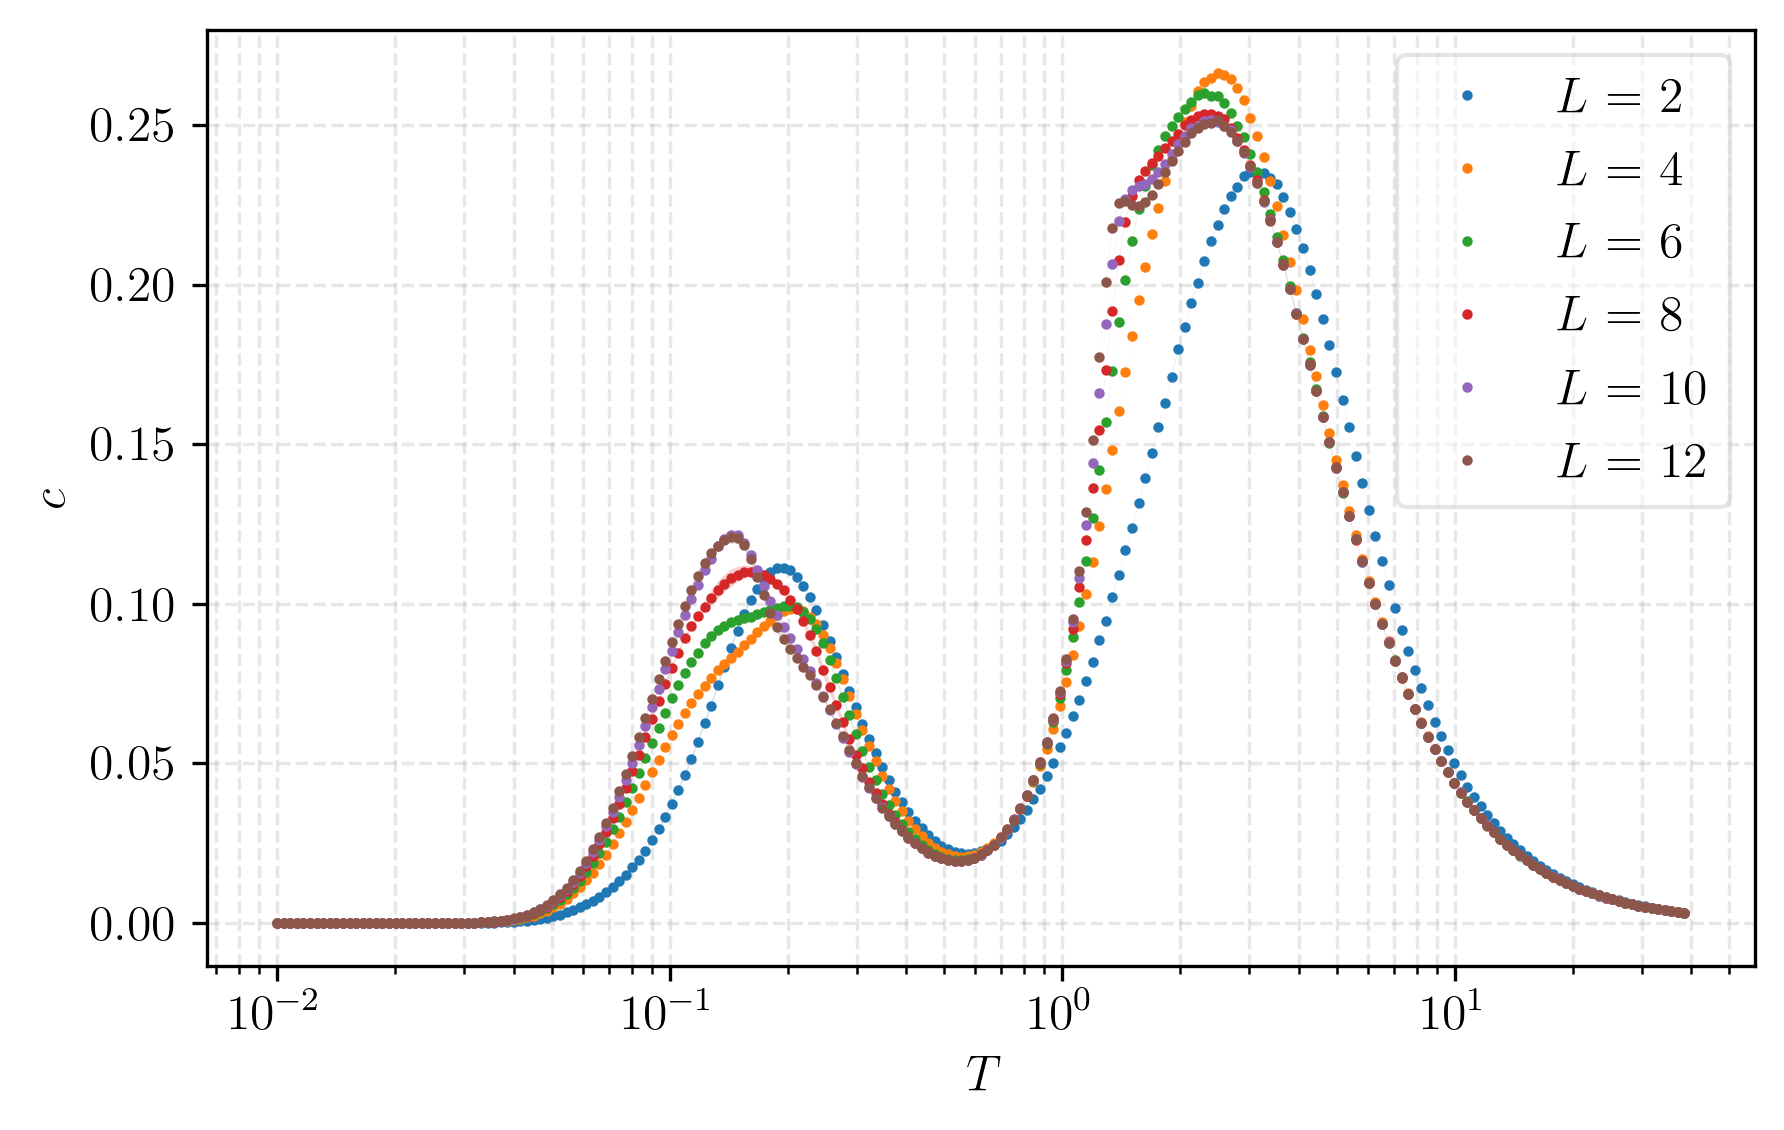

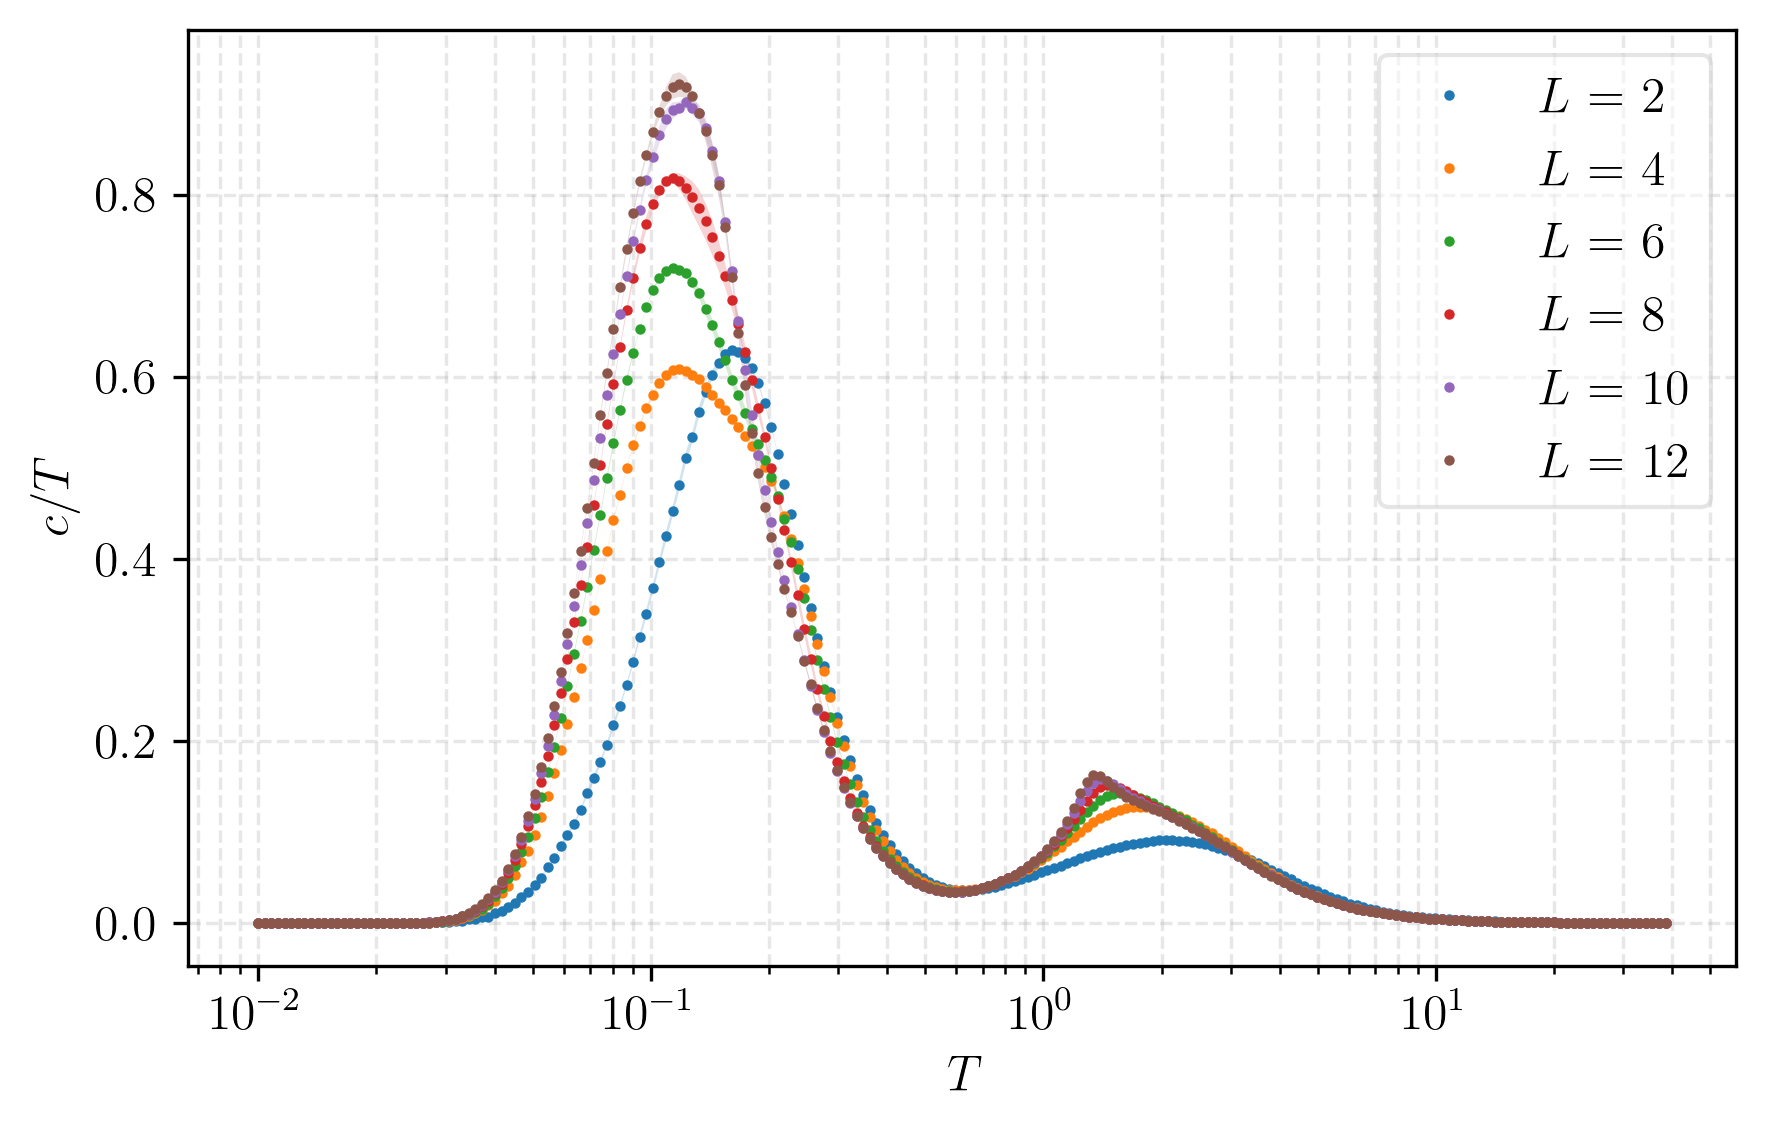

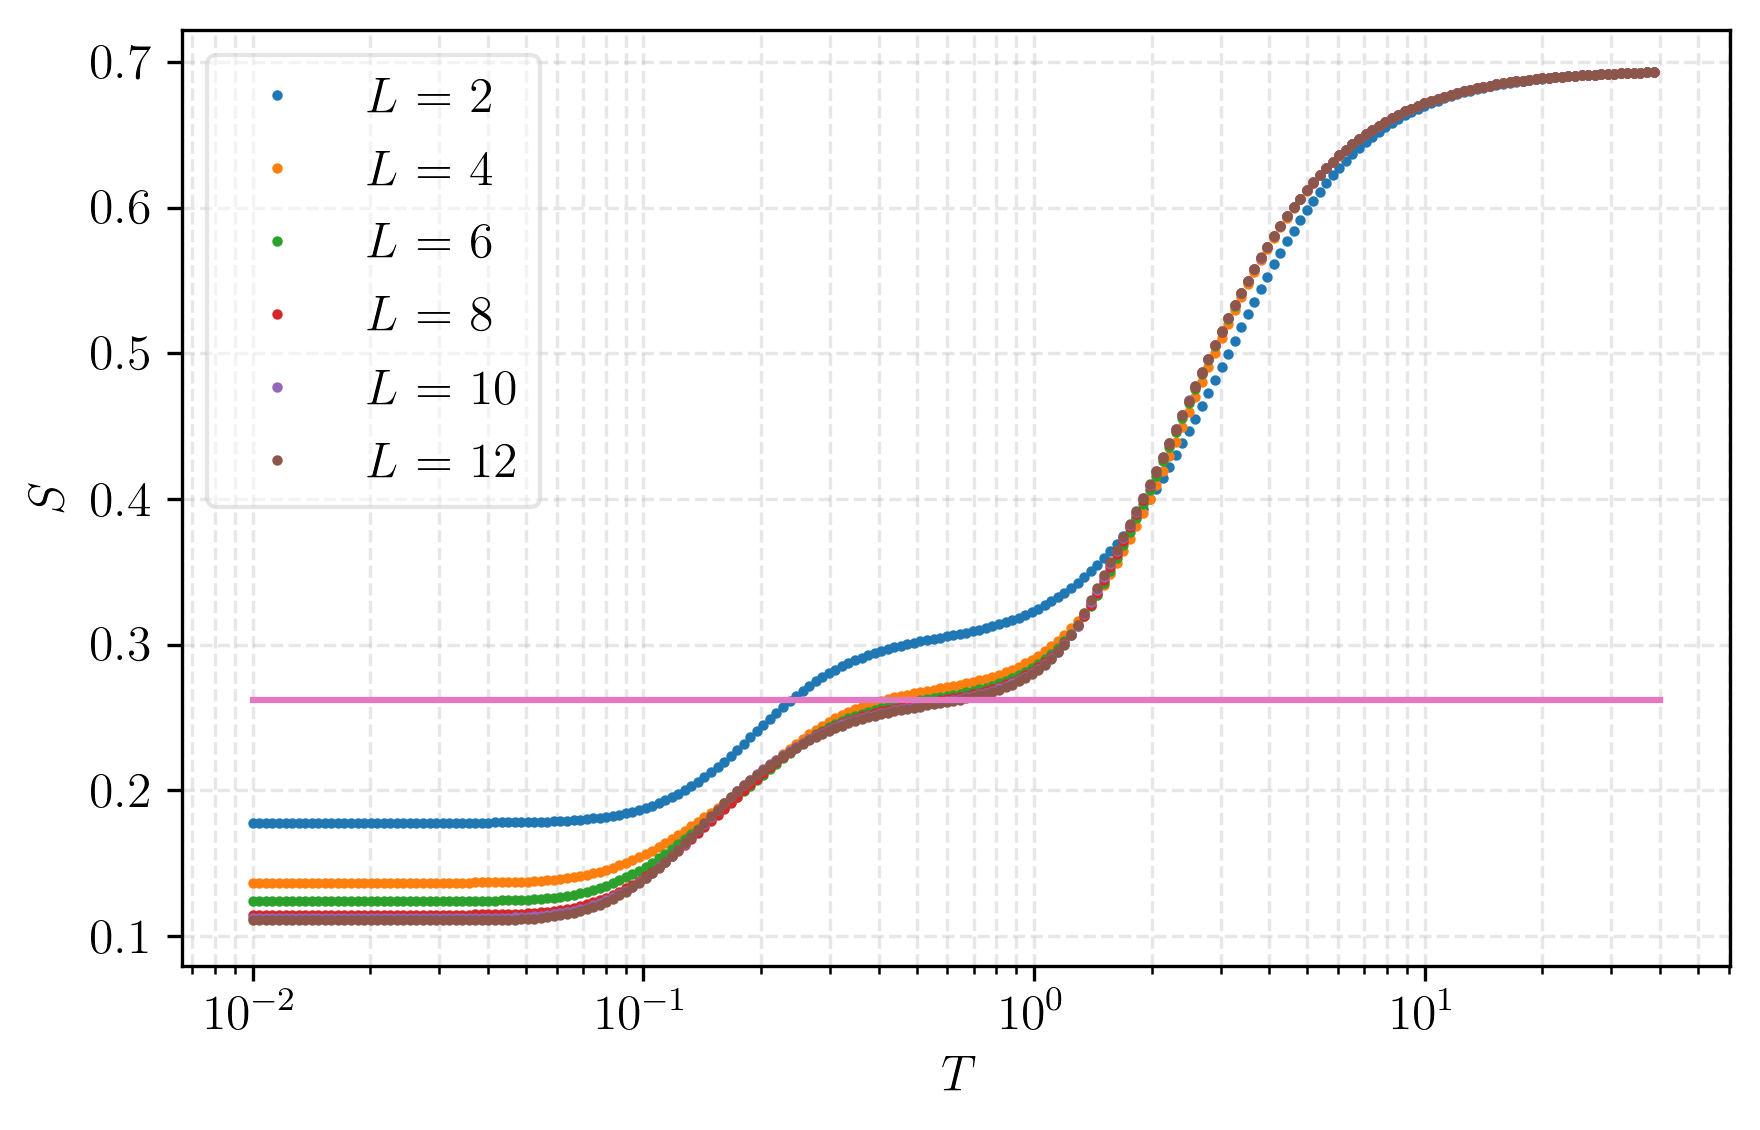

In [27]:
margin = [0.12, 0.2, 0.02, 0.02]
figsize = (6,4)
markersize = 3
hid = 0
plt.figure(figsize=figsize,dpi=300)
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
for i in range(n):
    plt.semilogx(temperatures_plots[0][tidmin:tidmax],
                 C[i][tidmin:tidmax],'.', markersize=markersize,\
                      label = r'$L$ = {0}'.format(L[i]))
    plt.fill_between(temperatures_plots[0][tidmin:tidmax],
                     C[i][tidmin:tidmax]-ErrC[i][tidmin:tidmax],
                     C[i][tidmin:tidmax]+ErrC[i][tidmin:tidmax],
                     alpha=0.2)
plt.xlabel(r'$T$')
plt.ylabel(r'$c$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.legend(loc= 'best', ncol = 1, framealpha=0.5)
plt.savefig('./' + foldername  + results_foldername+ '/SpecificHeatPerSite_VariousSizes.png')


plt.figure(figsize=figsize,dpi=300)
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
for i in range(n):
    plt.semilogx(temperatures_plots[0][tidmin:tidmax],
                 C[i][tidmin:tidmax]/temperatures_plots[0][tidmin:tidmax],
                 '.', markersize=markersize,\
                      label = r'$L$ = {0}'.format(L[i]))
    plt.fill_between(temperatures_plots[0][tidmin:tidmax],
                     (C[i][tidmin:tidmax]-ErrC[i][tidmin:tidmax])/temperatures_plots[0][tidmin:tidmax],
                     (C[i][tidmin:tidmax]+ErrC[i][tidmin:tidmax])/temperatures_plots[0][tidmin:tidmax],
                     alpha=0.2)
plt.xlabel(r'$T$')
plt.ylabel(r'$c/T$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.legend(loc= 'best', ncol = 1, framealpha=0.5)
plt.savefig('./' + foldername  + results_foldername+ '/CPerSiteoverT_VariousSizes.png')

plt.figure(figsize=figsize,dpi=300)
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])

for i in range(n):
    plt.semilogx(temperatures_plots[0][tidmin:tidmax],
                 S[i][tidmin:tidmax],
                 '.', markersize=markersize,\
                      label = r'$L$ = {0}'.format(L[i]))
    plt.fill_between(temperatures_plots[0][tidmin:tidmax],
                     Smin[i][tidmin:tidmax],
                     Smax[i][tidmin:tidmax],
                     alpha=0.2)

plt.plot([temperatures_plots[0][tidmin],temperatures_plots[0][tidmax]], [0.262, 0.262])
plt.xlabel(r'$T$')
plt.ylabel(r'$S$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.legend(loc= 'best', ncol = 1, framealpha=0.5)
plt.savefig('./' + foldername  + results_foldername+ '/Entropy_VariousSizes.png')

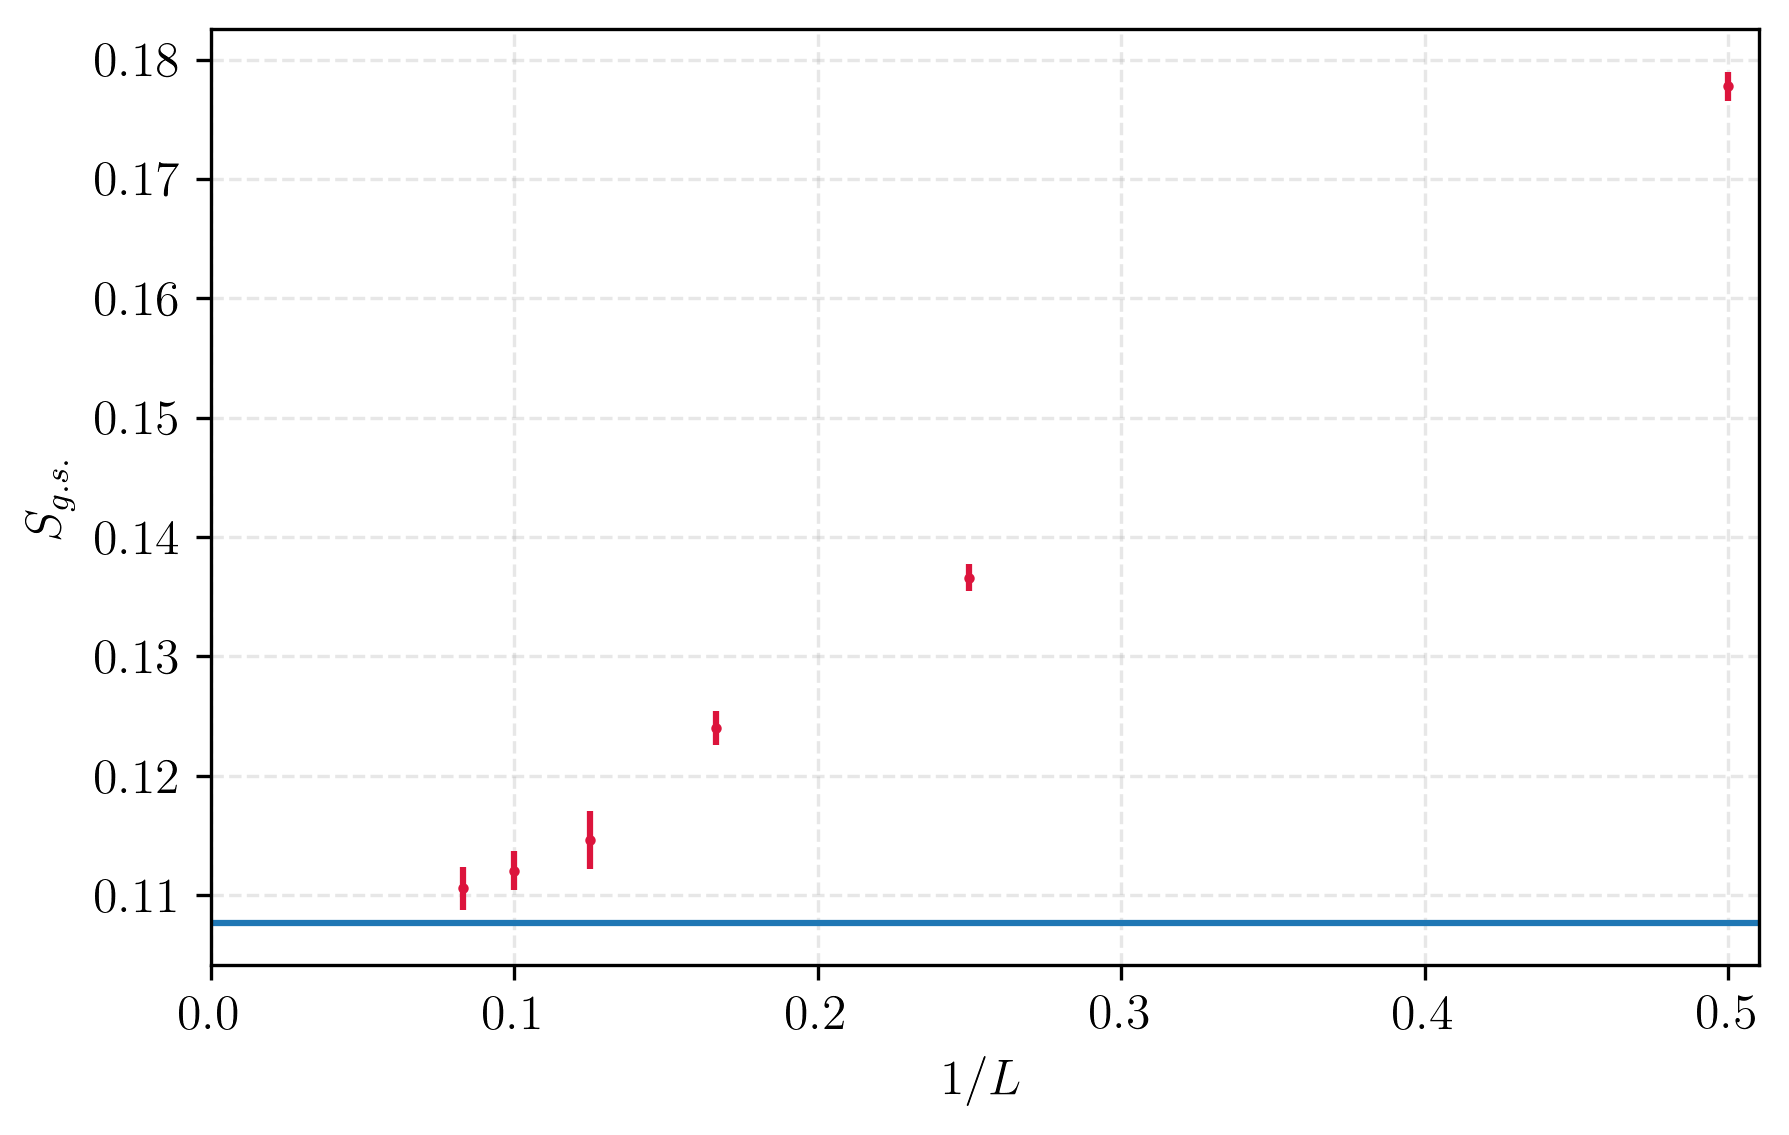

In [25]:
plt.figure(figsize=figsize,dpi=300)
margin = [0.12, 0.2, 0.02, 0.02]
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
plt.plot([0, 0.51],[0.10769, 0.10769])
for i in range(n):
    plt.errorbar(1/L[i],S[i][0], yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=markersize, color = 'crimson')
plt.xlabel(r'$1/L$')
plt.xlim([0,0.51])
plt.ylabel(r'$S_{g.s.}$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.savefig('./' + foldername  + results_foldername+ '/ResidualEntropy_VariousSizes.png')

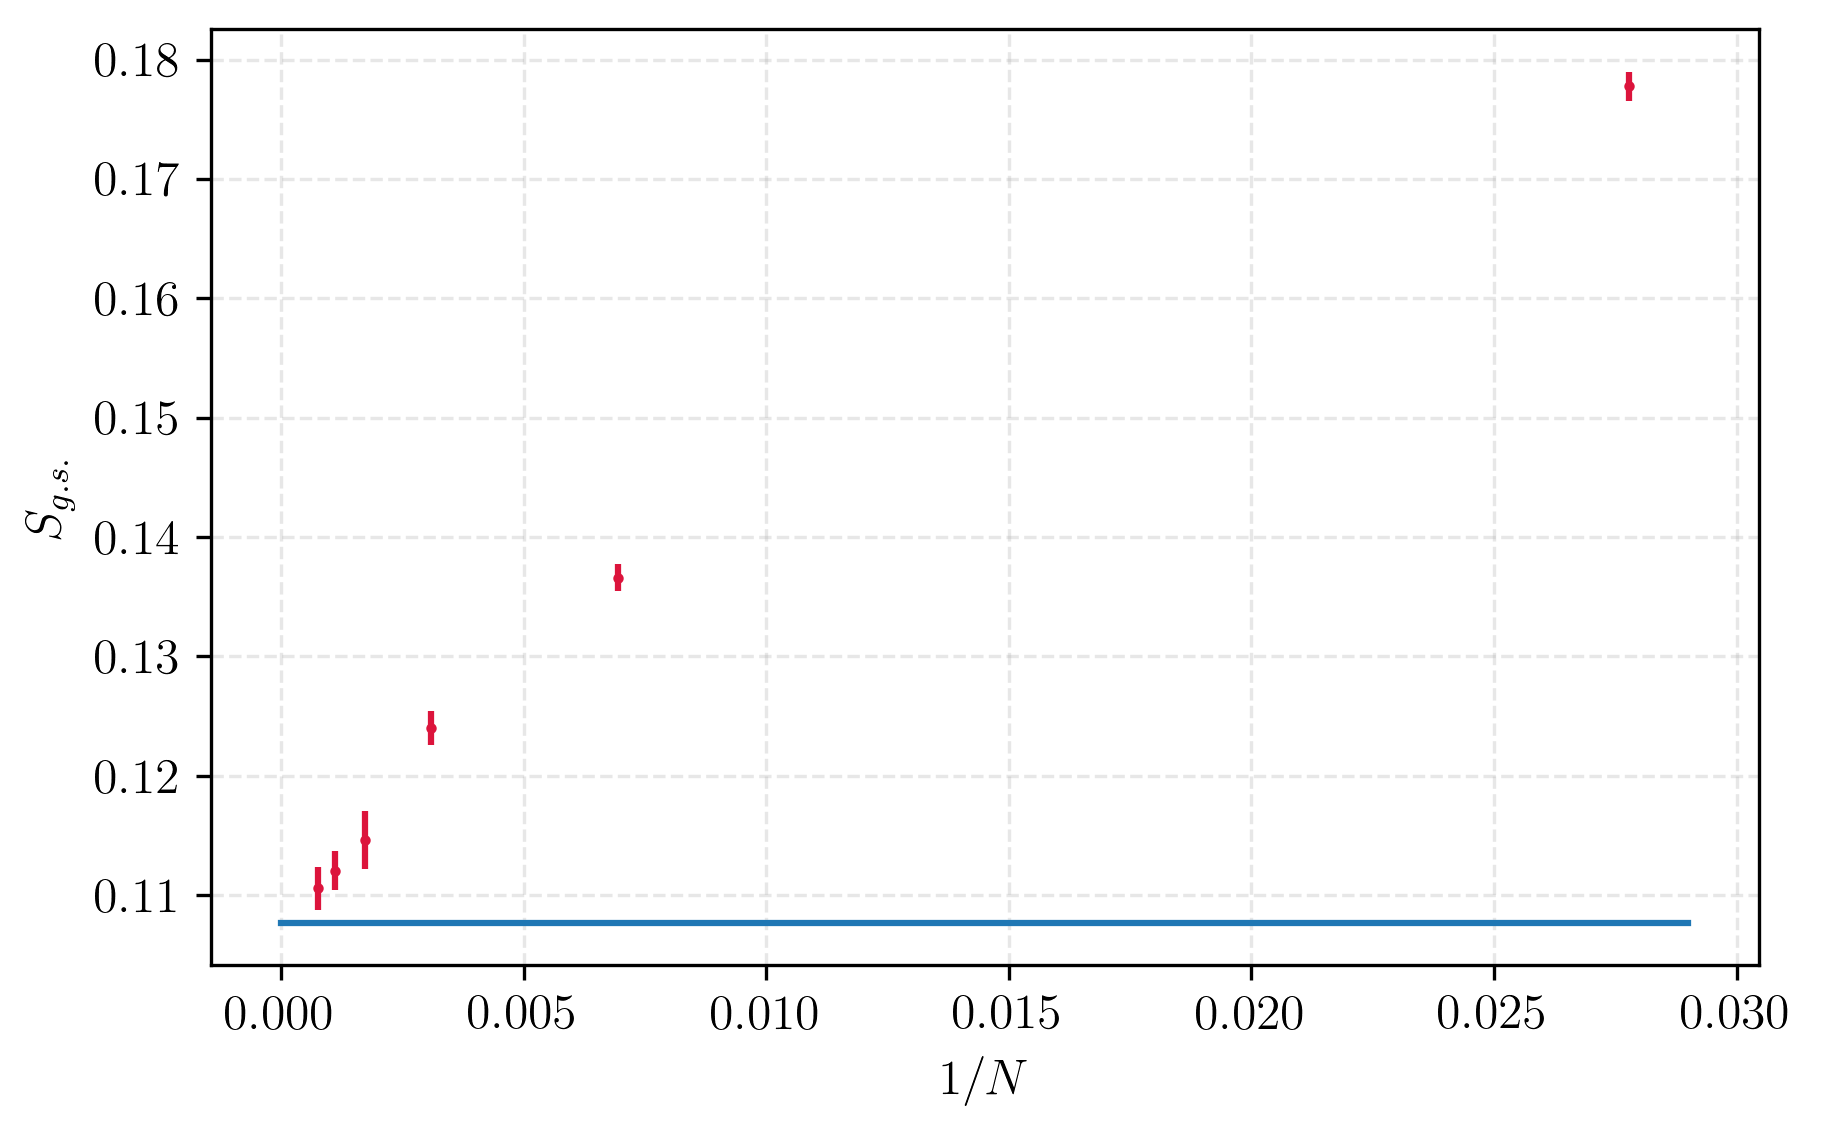

In [26]:
plt.figure(figsize=figsize,dpi=300)
margin = [0.12, 0.2, 0.02, 0.02]
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])

for i in range(n):
    plt.errorbar(1/(9*(L[i]**2)),S[i][0], yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=markersize, color = 'crimson')
plt.xlabel(r'$1/N$')
plt.plot([0, 0.029],[0.10769, 0.10769])
plt.ylabel(r'$S_{g.s.}$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.savefig('./' + foldername  + results_foldername+ '/ResidualEntropy_VariousSizes_N.png')